In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
import numpy as np
from google.colab import files
Uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [4]:
train=pd.read_csv('/content/train.csv', index_col='PassengerId')
test=pd.read_csv('/content/test.csv', index_col='PassengerId')
submission=pd.read_csv('/content/gender_submission.csv', index_col='PassengerId')

In [5]:
print(train.head())

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]


In [ ]:
print(train.shape, test.shape, submission.shape)

(891, 11) (418, 10) (418, 1)


In [6]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [12]:
train['Cabin'].value_counts()
#train['Cabin'].unique

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
E17            1
E58            1
C118           1
A32            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [13]:
train=train.drop(columns='Cabin')
test=test.drop(columns='Cabin')

In [14]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
train['Age'].fillna(29.699118, inplace=True)
test['Age'].fillna(30.272590, inplace=True)
print(train.isnull().sum())
print()
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [ ]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
Embarked_most_freq = train['Embarked'].value_counts(dropna=True).idxmax()

In [18]:
train['Embarked'].fillna(Embarked_most_freq, inplace=True)
test['Fare'].fillna(method='ffill', inplace=True)
print(train.isnull().sum())
print()
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [23]:
print(train.shape, test.shape)
print()
print(train.columns)
print(test.columns)

(891, 10) (418, 9)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


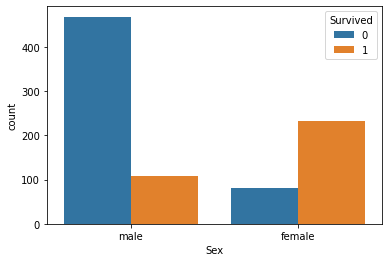

In [24]:
sns.countplot(data=train, x='Sex', hue='Survived')

In [25]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [26]:
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
train['Sex'].replace({'male':1, 'female':0},inplace=True)
test['Sex'].replace({'male':1, 'female':0},inplace=True)

In [28]:
train['Sex'].unique()

array([1, 0])

In [29]:
test['Sex'].unique()

array([1, 0])

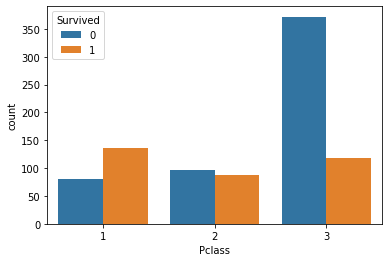

In [30]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [31]:
print(train['Pclass'].dtypes)

int64


In [32]:
train['Pclass'] = train['Pclass'].astype('category')
test['Pclass'] = test['Pclass'].astype('category')

In [33]:
train.dtypes

Survived       int64
Pclass      category
Name          object
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
dtype: object

In [34]:
test.dtypes

Pclass      category
Name          object
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
dtype: object

In [35]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

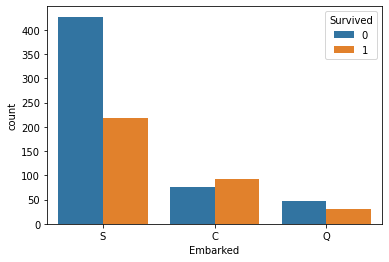

In [36]:
sns.countplot(data=train, x='Embarked', hue='Survived')

In [37]:
train=train.drop(columns=['Name','Ticket'])
test=test.drop(columns=['Name','Ticket'])

In [38]:
print(train.dtypes)
print(train.isna().sum())

Survived       int64
Pclass      category
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [39]:
print(test.dtypes)
print(test.isna().sum())

Pclass      category
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [40]:
onehot_train = pd.get_dummies(train)
print(onehot_train.columns)
print(onehot_train.dtypes)
print()
onehot_test = pd.get_dummies(test)
print(onehot_test.columns)
print(onehot_test.dtypes)

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Survived        int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


In [41]:
print(onehot_train['Pclass_2'])

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    1
888    0
889    0
890    0
891    0
Name: Pclass_2, Length: 891, dtype: uint8


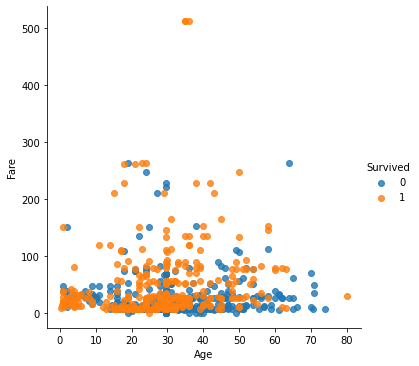

In [42]:
sns.lmplot(data=train, x='Age', y='Fare', fit_reg=False, hue='Survived')

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
Ytrain=onehot_train['Survived']
Xtrain=onehot_train[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1','Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
Xtest=onehot_test[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2','Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [45]:
print(Xtrain.shape, Ytrain.shape, Xtest.shape)
Xtrain.head()

(891, 11) (891,) (418, 11)


,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,22.0,1,0,7.2500,0,0,1,0,0,1
2,0,38.0,1,0,71.2833,1,0,0,1,0,0
3,0,26.0,0,0,7.9250,0,0,1,0,0,1
4,0,35.0,1,0,53.1000,1,0,0,0,0,1
5,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [47]:
model=DecisionTreeClassifier(max_depth=8, random_state=18)
# random_state is an arbitrary number.
model.fit(Xtrain, Ytrain)
predictions=model.predict(Xtest)
submission['Survived'] = predictions
submission.to_csv('Result.csv')
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [48]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [49]:
Xtrain = preprocessing.StandardScaler().fit(Xtrain).transform(Xtrain)
Xtest = preprocessing.StandardScaler().fit(Xtest).transform(Xtest)

In [50]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [51]:
tree_model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
predictions=tree_model.predict(Xtest)
submission['Survived'] = predictions
submission.to_csv('Result1.csv')
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
